<a href="https://colab.research.google.com/github/W8andHope/scripts/blob/main/simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st 
import random

In [ ]:
def current_milli_time():
    return round(time.thread_time() * 10000)

Números pseduoaleatorios:  [0.755587, 0.410465, 0.211794, 0.009001, 0.414702, 0.047551, 0.538888, 0.131883, 0.750872, 0.227761, 0.880157, 0.410913, 0.768232, 0.085306, 0.827158, 0.928392, 0.064934, 0.410872, 0.52137, 0.069547, 0.643152, 0.972605, 0.047689, 0.694593, 0.319658, 0.800959, 0.389444, 0.016844, 0.596374, 0.109295, 0.179314, 0.733759, 0.600247, 0.272083, 0.230516, 0.707783, 0.451842, 0.032613, 0.582643, 0.24388, 0.172019, 0.86206, 0.546523, 0.760609, 0.986072, 0.141797, 0.982481, 0.401641, 0.634703, 0.590824, 0.796371, 0.884572, 0.051206, 0.110191, 0.387754, 0.633915, 0.514238, 0.966285, 0.534607, 0.995158, 0.135553, 0.98486, 0.948925, 0.076738, 0.292067, 0.177688, 0.487595, 0.516828, 0.361639, 0.973695, 0.752923, 0.2218, 0.871935, 0.976473, 0.567182, 0.873247, 0.921753, 0.920024, 0.555559, 0.750428, 0.484187, 0.244634, 0.821874, 0.165023, 0.950996, 0.464723, 0.45145, 0.555067, 0.027565, 0.250579, 0.325506, 0.034937, 0.837823, 0.895822, 0.481444, 0.948269, 0.848501, 0.592489,

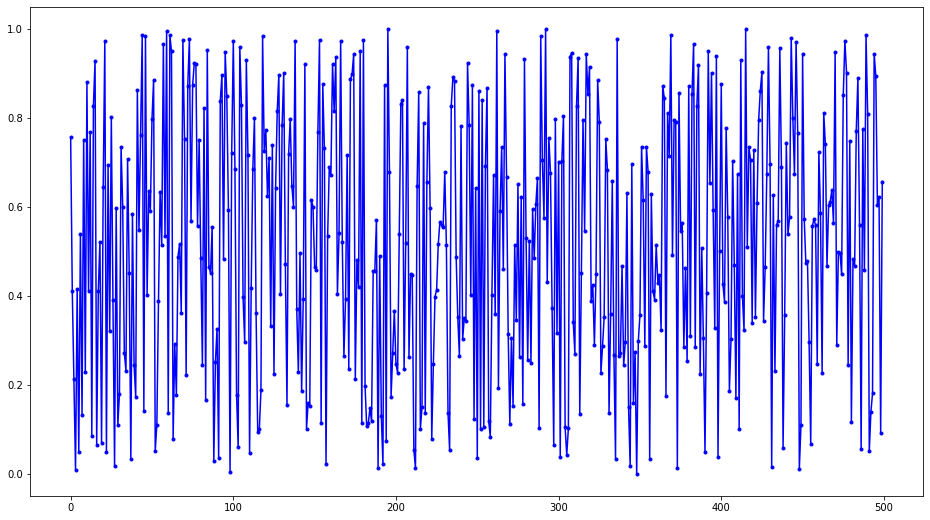

In [62]:
n = 1000
values = []
#la semilla será dinámica, se usa el tiempo del sistema local 
#multiplicado por un número aleatorio de la librería random
ini = round(current_milli_time() * random.random())

#definimos la función del GLC
def glc(modulus, a, c, seed):
      global i 
      i = 0
      while i < n: 
        seed = (a * seed + c) % modulus
        values.append(round(seed/(modulus-1),6))
        i += 1

#introducimos los valores iniciales
glc(2**32,1103515245,12345,ini)
print("Números pseduoaleatorios: ",values)

#guardado de data en archivos .csv y .txt
name=str(ini)
df = pd.DataFrame({'':values}) 
df.to_csv('numeros.csv', index=False,sep=';',decimal='.')
df.to_csv('numeros.txt', index=False,sep=';',decimal='.')

#ploteo
plt.figure(figsize=(16,9))
plt.plot(range(500),values[0:500], marker=".", color="blue")
plt.show()

In [ ]:
#Minigenerador usando los mismo parámetros, este lo usaremos para la simulación
def mglc ():
  global a, c, modulus, seed
  seed = round(current_milli_time() * random.random())
  a = 1103515245
  c = 12345
  modulus = 2**32
  seed = (a * seed + c) % modulus
  return round(seed/(modulus-1),6)

In [63]:
def simulacion(n):
  global sum1, sum2, p1, p2
  sum1 = 0
  sum2 = 0
  ncaja = 0
  cajas = list( {} for ncaja in range(n))
  while ncaja < n:
      #primer evento: selección de caja a inspeccionar
      r=mglc()
      if (r<=0.3):
        cajas[ncaja]["estado_caja"] = 1
      else:
        cajas[ncaja]["estado_caja"] = 0

      #segundo evento: cantidad de productos seleccionados a inspeccionar
      r=mglc()
      if (cajas[ncaja]["estado_caja"]==0):
        cajas[ncaja]["productos_seleccionados"]=0
      else: 
        if (r>0.8):
          cajas[ncaja]["productos_seleccionados"]=3
        else: 
          if (r>0.5):
            cajas[ncaja]["productos_seleccionados"]=2
          else:
            cajas[ncaja]["productos_seleccionados"]=1
      #tercer evento: estado de los productos de la caja
      r=mglc()
      if (r<=0.03):
        cajas[ncaja]["estado_producto"] = 1
      else:
        cajas[ncaja]["estado_producto"] = 0

      #cuarto evento: inspección de productos seleccionados : productos defectuosos encontrados
      r=mglc()
      if (cajas[ncaja]["estado_caja"]==0):
        cajas[ncaja]["productos_defectuosos_encontrados"] = 0
      else:
        if (cajas[ncaja]["estado_producto"] == 0):
          cajas[ncaja]["productos_defectuosos_encontrados"] = 0
        else: 
          if (r<=(cajas[ncaja]["productos_seleccionados"]*0.1)):
            cajas[ncaja]["productos_defectuosos_encontrados"] = 1
          else:
            cajas[ncaja]["productos_defectuosos_encontrados"] = 0
      sum1 = sum1 + cajas[ncaja]["productos_defectuosos_encontrados"]

      #cuarto evento: inspección de productos seleccionados : productos defectuosos no encontrados
      if (cajas[ncaja]["estado_producto"]==0):
        cajas[ncaja]["productos_defectuosos_no_encontrados"] = 0
      else:
        if (cajas[ncaja]["estado_caja"] == 0):
          cajas[ncaja]["productos_defectuosos_no_encontrados"] = 1
        else: 
          if (r<=(cajas[ncaja]["productos_seleccionados"]*0.1)):
            cajas[ncaja]["productos_defectuosos_no_encontrados"] = 0
          else:
            cajas[ncaja]["productos_defectuosos_no_encontrados"] = 1
      sum2 = sum2 + cajas[ncaja]["productos_defectuosos_no_encontrados"]

      #mostrar cajas 
      print("CAJA",ncaja+1,":",cajas[ncaja],"\n")
      ncaja += 1

  p1 = sum1 / n
  p2 = sum2 / n
  print("Probabilidad de encontrar una caja con productos defectuosos en la inspección: ",p1,"\n")
  print("Probabilidad de que una caja con productos defectuosos pase la inspección: ",p2)   


simulacion(1000)


CAJA 1 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 2 : {'estado_caja': 1, 'productos_seleccionados': 3, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 3 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 4 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 5 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 6 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 7 : {